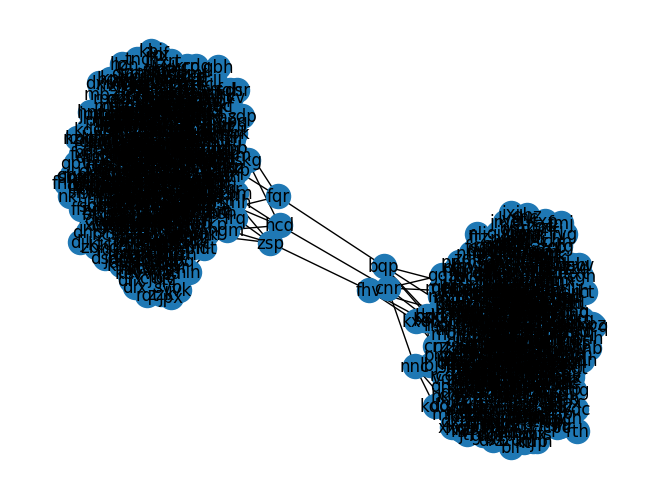

In [15]:
from tqdm import tqdm
import numpy as np
from numpy.linalg import lstsq
from sklearn.linear_model import LinearRegression
import itertools
import networkx as nx

with open("data.txt") as file:
    data = file.read().splitlines()


class Edge():

    all_edges = []
    g = nx.Graph()

    def __init__(self, node_1, node_2) -> None:
        self.node_1 = node_1
        self.node_2 = node_2

        self.node_1.edges.append(self)
        self.node_2.edges.append(self)

        Edge.all_edges.append(self)
        Edge.g.add_edge(node_1.name, node_2.name)

    def remove_edge(self):
        self.node_1.edges.remove(self)
        self.node_2.edges.remove(self)

    def add_edge(self):
        self.node_1.edges.append(self)
        self.node_2.edges.append(self)

    def __repr__(self) -> str:
        return f'{self.node_1.name} - {self.node_2.name}'

class Node():
    def __init__(self, name) -> None:
        self.name = name
        self.edges = []

    def __repr__(self) -> str:
        return self.name

nodes = dict()

for line in data:

    node_1_name = line.split(":")[0]
    connections_names = line.split(": ")[1].split()

        
    node_1 = nodes.get(node_1_name, Node(node_1_name))
    nodes[node_1_name] = node_1

    for name in connections_names:

        node_connection = nodes.get(name, Node(name))
        nodes[name] = node_connection

        edge = Edge(node_1, node_connection)


def traverse_nodes(node, visited):

    visited.add(node.name)

    for edge in node.edges:
        for adj_node in [edge.node_1, edge.node_2]:
            if adj_node.name not in visited:
                traverse_nodes(adj_node, visited)

    return visited

nx.draw(Edge.g, with_labels = True)

In [24]:
nodes['fqr'].edges[-1].remove_edge()

In [25]:
nodes['hcd'].edges[-1].remove_edge()

In [26]:
nodes['zsp'].edges[0].remove_edge()

In [33]:
len(traverse_nodes(nodes['fqr'], set())) * len(traverse_nodes(nodes['bqp'], set()))

568214

In [35]:
nx.minimum_edge_cut(Edge.g)

{('bqp', 'fqr'), ('cnr', 'hcd'), ('fhv', 'zsp')}